In [1]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(images_train, labels_train), (images_test, labels_test) = mnist.load_data() 

In [3]:
image_height = 28
image_width = 28
channel = 1
input_shape = (image_height, image_width, channel)
number_classes = 10
batch_size = 20
epochs = 6
optimizer = Adam(learning_rate = 0.0001)

In [4]:
images_train = images_train.astype('float32')
images_test = images_test.astype('float32')

train_labels = to_categorical(labels_train)
test_labels = to_categorical(labels_test)
images_train[0].shape

(28, 28)

In [5]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size = (3, 3), strides = (1, 1), padding = 'same', 
                 activation = 'relu', input_shape = input_shape, kernel_regularizer= l1(0.001)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 8, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_regularizer= l1(0.001)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
Dropout(0.2)
model.add(Dense(number_classes, activation = 'softmax'))

In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 16)                6

In [7]:
print(images_train.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000, 10)


In [8]:
ModelHistory = model.fit(images_train, train_labels, validation_split = 0.10, epochs = epochs, batch_size = batch_size)

Epoch 1/6
2700/2700 [==============================] - 25s 9ms/step - loss: 3.1419 - accuracy: 0.2445 - val_loss: 1.9211 - val_accuracy: 0.3277
Epoch 2/6
2700/2700 [==============================] - 25s 9ms/step - loss: 1.3858 - accuracy: 0.5722 - val_loss: 0.8743 - val_accuracy: 0.7517
Epoch 3/6
2700/2700 [==============================] - 25s 9ms/step - loss: 0.7918 - accuracy: 0.7859 - val_loss: 0.5368 - val_accuracy: 0.8562
Epoch 4/6
2700/2700 [==============================] - 25s 9ms/step - loss: 0.4583 - accuracy: 0.8758 - val_loss: 0.2977 - val_accuracy: 0.9213
Epoch 5/6
2700/2700 [==============================] - 25s 9ms/step - loss: 0.2968 - accuracy: 0.9254 - val_loss: 0.2243 - val_accuracy: 0.9453
Epoch 6/6
2700/2700 [==============================] - 26s 10ms/step - loss: 0.2346 - accuracy: 0.9413 - val_loss: 0.1926 - val_accuracy: 0.9545


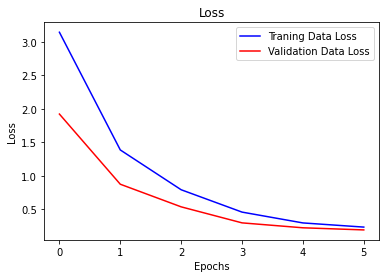

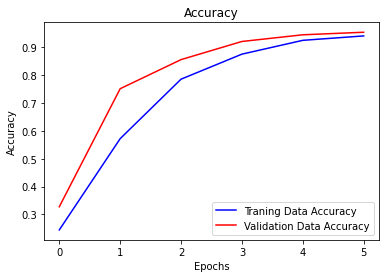

In [9]:
# Draw Loss Plot
plt.plot(ModelHistory.history['loss'], color = 'blue', label = 'Traning Data Loss')
plt.plot(ModelHistory.history['val_loss'], color = 'red', label = 'Validation Data Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw Accuracy Plot
plt.plot(ModelHistory.history['accuracy'], color = 'blue', label = 'Traning Data Accuracy')
plt.plot(ModelHistory.history['val_accuracy'], color = 'red', label = 'Validation Data Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(images_test, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2134 - accuracy: 0.9463
test_acc: 0.9463000297546387
